In [69]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

$\large{\text{(A) Constant Function}}$

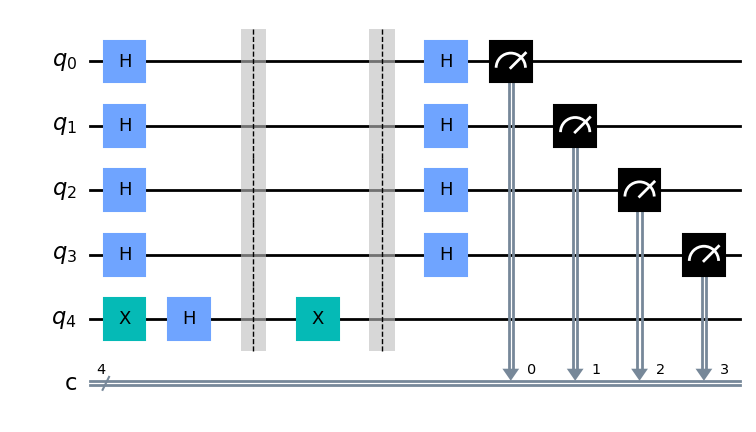

In [70]:
n = 4
case = 'c' #b - balanced, c - constant
setup = '1001'
qc = QuantumCircuit(n+1, n)
qc.x(n)
for i in range(n+1):
    qc.h(i)

qc.barrier()
if case == 'c' and np.random.randint(2):
    qc.x(n)
else:    
    for i in range(n):
        if setup[i] == '1':
            qc.x(i)
        qc.cx(i, n)
        if setup[i] == '1':
            qc.x(i)

qc.barrier()
for i in range(n):
    qc.h(i)

for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')

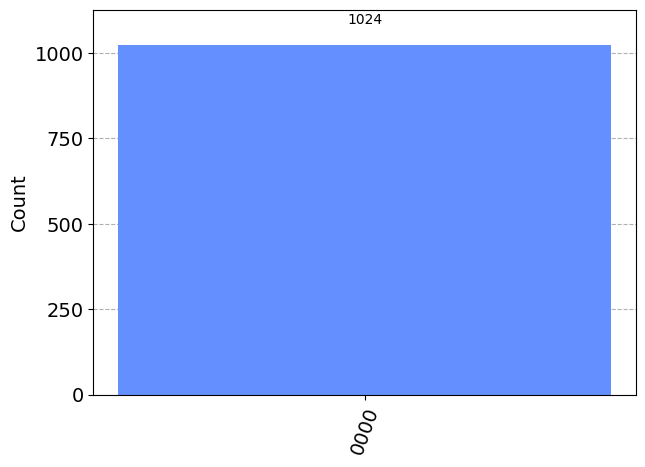

In [71]:
sim = Aer.get_backend('aer_simulator')
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

Notice that the output is alway |0> denoting a constant function

$\large{\text{(B) Balanced Function}}$

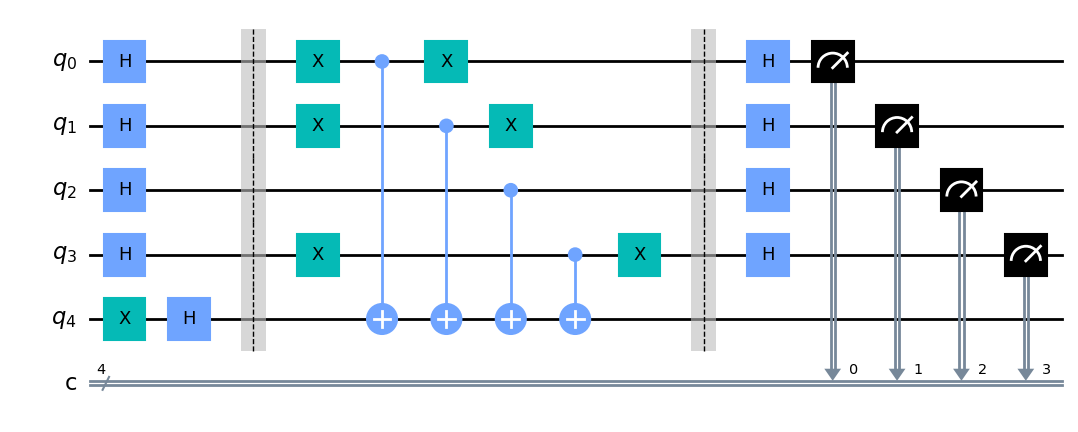

In [72]:
n = 4
case = 'b' #b - balanced, c - constant
setup = '1101'
qc = QuantumCircuit(n+1, n)
qc.x(n)
for i in range(n+1):
    qc.h(i)

qc.barrier()
if case == 'c' and np.random.randint(2):
    qc.x(n)
else:    
    for i in range(n):
        if setup[i] == '1':
            qc.x(i)
        qc.cx(i, n)
        if setup[i] == '1':
            qc.x(i)

qc.barrier()
for i in range(n):
    qc.h(i)

for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')

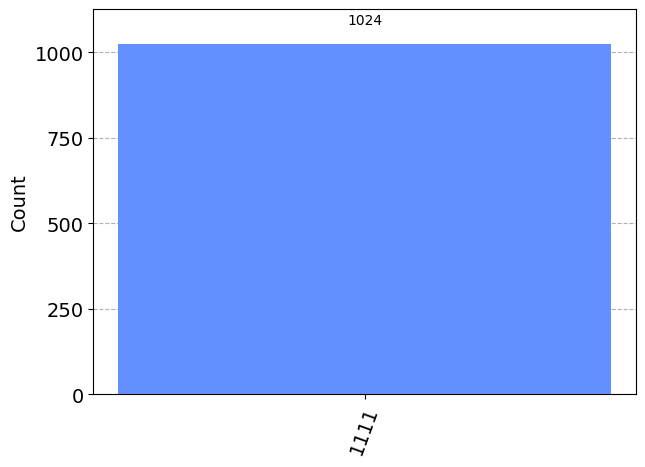

In [73]:
sim = Aer.get_backend('aer_simulator')
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

Notice that the output is never |0000>, indicating that it is not a constant, but a balanced function